# Challenge 1: Titanic - Machine Learning From Disaster 

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("Titanic.jpg")

## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bộ dữ liệu Titanic chứa thông tin về các hành khách trên con tàu Titanic bị chìm năm 1912. Mục tiêu của bài toán là dự đoán khả năng sống sót của hành khách dựa trên các đặc điểm cá nhân như tuổi, giới tính, hạng vé, giá vé, v.v. Đây là một bài toán phân loại nhị phân (binary classification) trong học máy.

+ **Dữ liệu vào**:
    + Pclass – Hạng vé (1 = Hạng nhất, 2 = Hạng hai, 3 = Hạng ba)
    + Name – Tên hành khách
    + Sex – Giới tính
    + Age – Tuổi của hành khách
    + SibSp – Số anh/chị/em ruột hoặc vợ/chồng đi cùng
    + Parch – Số cha/mẹ hoặc con đi cùng
    + Ticket – Mã vé
    + Fare – Giá vé
    + Cabin – Số phòng
    + Embarked – Cảng lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton)
    
+ **Kết quả**: Survived - Biến mục tiêu (Target Variable): 
    + 0: Không sống sót
    + 1: Sống sót

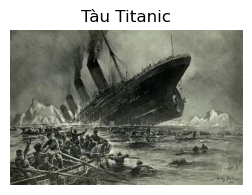

In [3]:
plt.figure(figsize=(3,3))
plt.imshow(image.resize((600,400))), plt.axis("off"), plt.title("Tàu Titanic")
plt.show()

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [5]:
# Load dataset
df_train = pd.read_csv("../../data/train.csv")
df_test = pd.read_csv("../../data/test.csv")

## 3. Phân tích khám phá dữ liệu (Exploration Analyze Data - EDA)

### 3.1. Thống kê mô tả (Descriptive Statistics) - Ungraphic Approach

#### (1) **Hiển thị một số thông tin về dữ liệu**

In [6]:
# shape
print(f'+ Shape: {df_train.shape}')
# types
print(f'+ Data Types: \n{df_train.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_train.head(5))
display.display(df_train.tail(5))
# info
df_train.info()

+ Shape: (891, 12)
+ Data Types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
+ Contents: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Nhận xét**:
+ Một số thuộc tính quan trọng có thể ảnh hưởng đến khả năng sống sót như: Pclass (hạng vé), Sex (giới tính), Age (tuổi), Fare (giá vé), Embarked (cảng lên tàu),...

+ Tổng số dòng dữ liệu là 891

+ Dữ liệu để phân lớp ở cột Survived

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**

In [7]:
# Kiểm tra giá trị thiếu
def isNull(df):
    print("="*5, "Checking Null", "="*5)
    display.display(df.isnull().sum())
    has_null = df.isnull().sum().any()
    print(f'--> Có giá trị Null: {has_null}')

In [8]:
isNull(df_train)

===== Checking Null =====


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--> Có giá trị Null: True


In [9]:
isNull(df_test)

===== Checking Null =====


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

--> Có giá trị Null: True


**Nhận xét:**
- Dữ liệu ở tập train có giá trị thiếu ở cột Age (177), Cabin (687) và Embarked (2)

- Dữ liệu ở tập test có giá trị thiếu ở cột Age (86), Fare (1) và Cabin (327)

#### (3) **Các tính chất thống kê trên dữ liệu số**

+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [10]:
display.display(df_train.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [11]:
display.display(df_test.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Peter, Master. Michael J",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Nhận xét:**

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

In [12]:
df_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Nhận xét:**
+ Dữ liệu cần phân loại 2 lớp: hành khách sống sót (1) và không sống sót (0).

+ Các lớp không cân bằng, trong đó số lượng hành khách không sống sót nhiều hơn số người sống sót.

In [13]:
train_cols = df_train.columns.tolist()
for cols in train_cols:
    print(df_train[cols].value_counts(),"\n")

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64 

Survived
0    549
1    342
Name: count, dtype: int64 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 

Sex
male      577
female    314
Name: count, dtype: int64 

**Nhận xét:**

- Một số cột như Pclass, Sex, và Embarked có số lượng giá trị lặp lại ít, thể hiện đây là thuộc tính phân loại (categorical features).
    + Pclass có 3 giá trị (1, 2, 3), trong đó hạng 3 chiếm đa số.
    + Sex có 2 giá trị: male và female, với male chiếm tỷ lệ cao hơn.
    + Embarked có 3 giá trị: S, C, Q, trong đó S là cảng được chọn nhiều nhất.

- Các cột Age, Fare, SibSp, và Parch là thuộc tính định lượng (numerical features):
    + Age và Fare là biến liên tục, thể hiện tuổi và giá vé của hành khách.
    + SibSp (số anh/chị/em hoặc vợ/chồng đi cùng) và Parch (số cha/mẹ hoặc con đi cùng) là biến rời rạc (discrete variables), thường có giá trị nhỏ và lặp lại nhiều.

- Các cột Name, Ticket, và Cabin là thuộc tính định danh (identifier features), có giá trị gần như duy nhất cho từng hành khách:
    + Ticket và Cabin vẫn có một số giá trị trùng lặp do hành khách cùng khoang hoặc cùng vé, nhưng phần lớn là khác nhau.
    + Name chỉ có thể được dùng để rút trích đặc trưng phụ (như danh xưng Mr., Mrs., Miss.), chứ không nên dùng trực tiếp trong mô hình.

In [14]:
numeric_cols = ['Age','SibSp','Parch','Fare']
categorical_cols = ['Pclass','Sex','Embarked']

# Trực quan hóa dữ liệu

### Phân bố từng thuộc tính

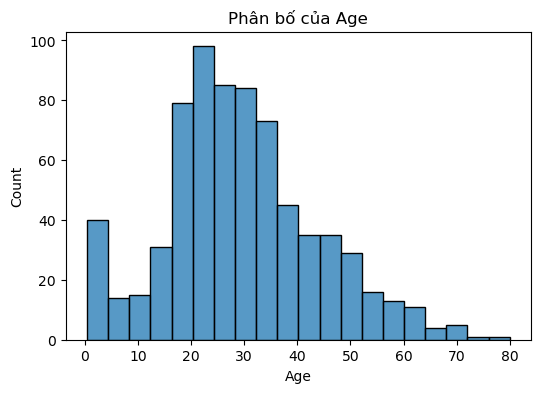

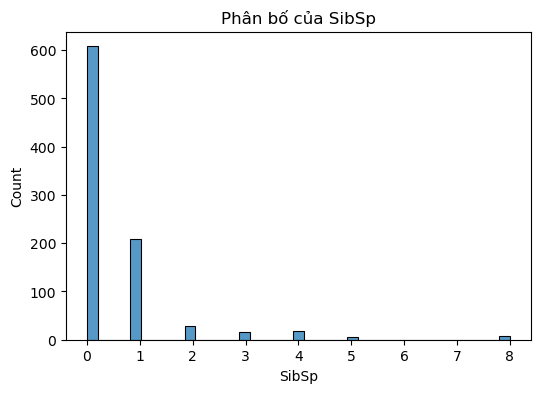

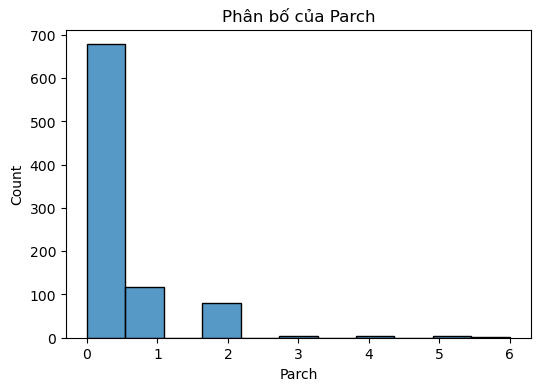

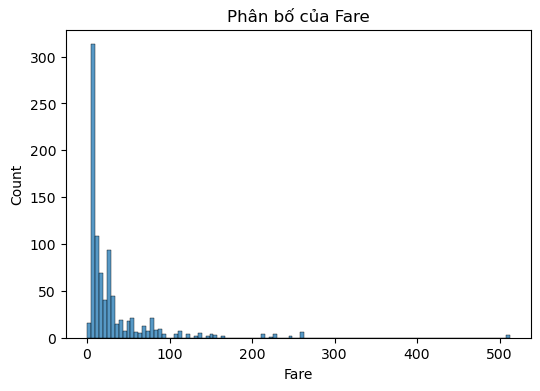

In [15]:
for cols in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(x=cols, data=df_train)
    plt.title(f"Phân bố của {cols}")
    plt.show()

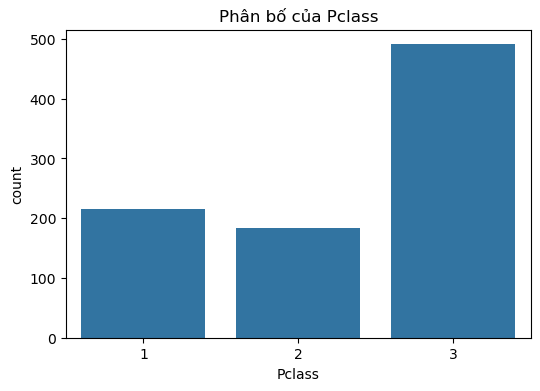

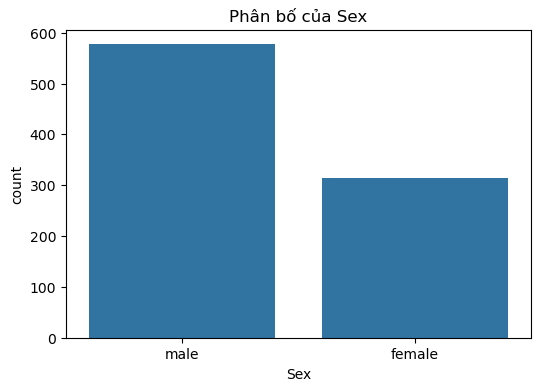

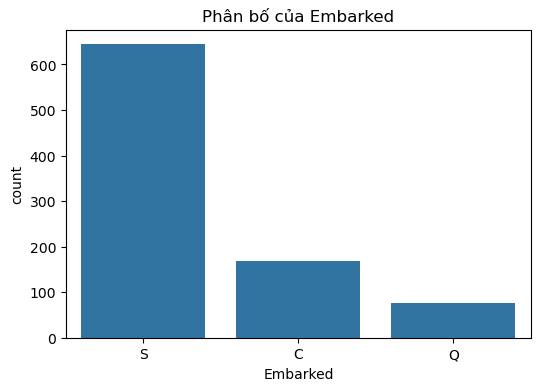

In [16]:
for cols in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cols, data=df_train)
    plt.title(f"Phân bố của {cols}")
    plt.show()

**Nhận xét**:

- Pclass: Gồm 3 hạng (1, 2, 3), hạng 3 chiếm tỷ lệ cao nhất → có thể ảnh hưởng đến tỷ lệ sống sót.

- Sex: Gồm 2 giá trị male và female, trong đó nam chiếm đa số.

- Age: Phân bố không đều, tập trung ở nhóm 20–40 tuổi → đại diện cho nhóm hành khách trưởng thành.

- SibSp, Parch: Phần lớn hành khách đi một mình (giá trị = 0). Một số ít đi cùng anh chị em hoặc cha mẹ (giá trị = 1 hoặc 2) → có thể ảnh hưởng đến khả năng sống sót theo nhóm gia đình.

- Fare: Phân bố lệch phải mạnh, đa số nằm trong khoảng 0–100, nhưng có một số giá trị rất cao (outlier), thường tương ứng với hạng vé cao hơn (Pclass 1) → liên quan đến hạng vé và khả năng sống sót.

- Embarked: Có 3 giá trị S, C, Q, trong đó S là cảng phổ biến nhất, cho thấy phần lớn hành khách lên tàu tại cảng Southampton.

### Trực quan hóa theo biến mục tiêu

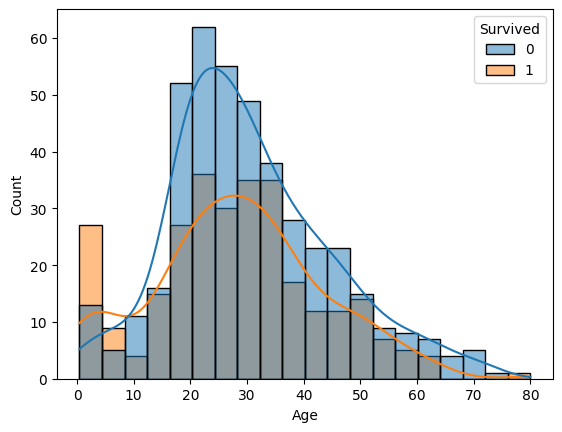

In [103]:
sns.histplot(x="Age", hue="Survived", data=df_train, bins=20, kde=True)
plt.show()

**Nhận xét:**
- Độ tuổi hành khách dao động từ 20-40, độ tuổi từ 0-10 có tỷ lệ sống sót cao hơn thể hiện việc ưu tiên trẻ em trong cứu hộ

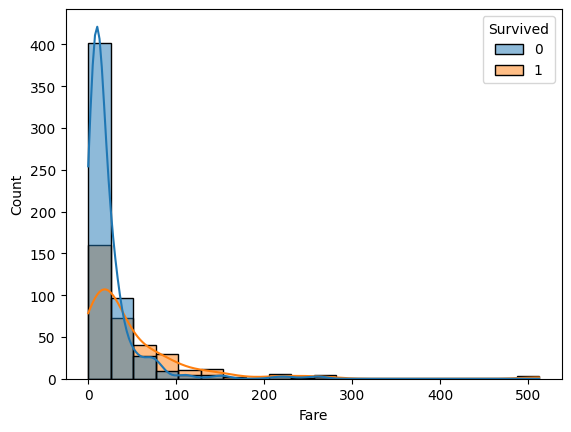

In [104]:
sns.histplot(x="Fare", hue="Survived", data=df_train, bins=20, kde=True)
plt.show()

**Nhận xét:**
- Hành khách trả giá vé càng cao thì khả năng sống sót càng lớn (liên quan đến hạng vé)

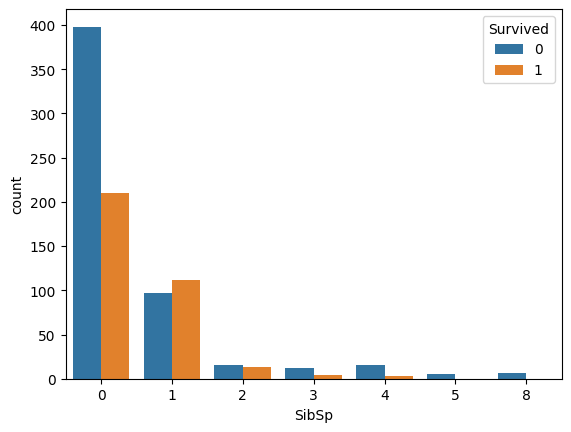

In [105]:
sns.countplot(x="SibSp", hue="Survived", data=df_train)
plt.show()

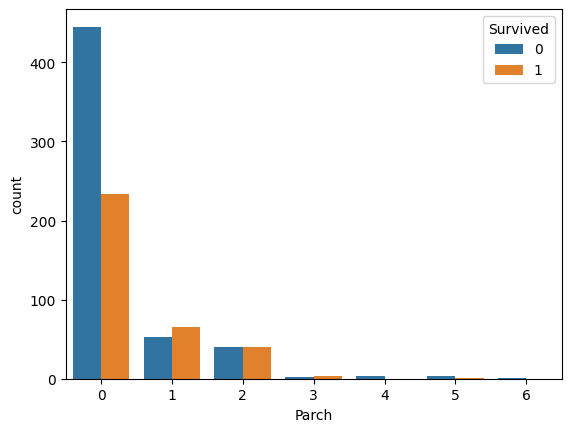

In [106]:
sns.countplot(x="Parch", hue="Survived", data=df_train)
plt.show()

**Nhận xét:**
- Người đi một mình có tỷ lệ sống sót thấp hơn người đi cùng gia đình (1 - 2 người)

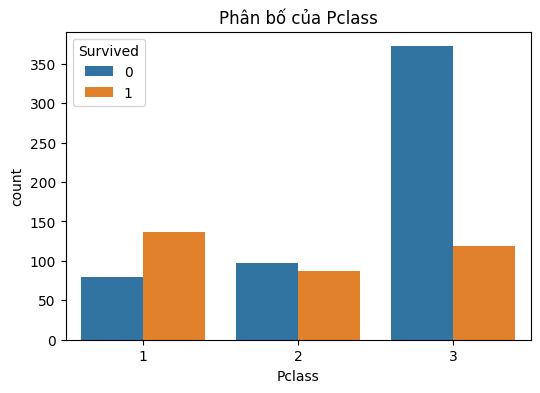

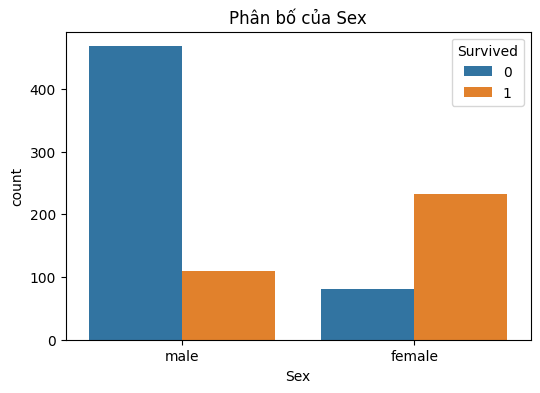

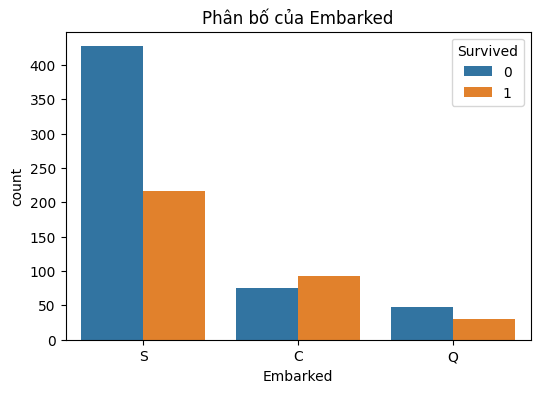

In [107]:
for cols in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cols, hue="Survived", data=df_train)
    plt.title(f"Phân bố của {cols}")
    plt.show()

Nhận xét các thuộc tính khi so sánh với biến mục tiêu:
- Pclass: Hành khách ở hạng vé 1 có tỷ lệ sống sót cao nhất, cao hơn so với đa số hành khách ở hạng vé 3.

- Sex: Tỷ lệ sống sót ở nữ giới cao hơn trong khi số lượng hành khách nam nhiều hơn thể hiện ưu tiên cứu hộ phụ nữ

- Embarked: Hành khách lên tàu từ cảng Cherbourg (C) có tỷ lệ sống cao hơn so với cảng Southampton (S)

### Phát hiện giá trị ngoại lai (Outlier)

Vẽ Boxplot Fare và Age để nhìn rõ giá trị ngoại lai:

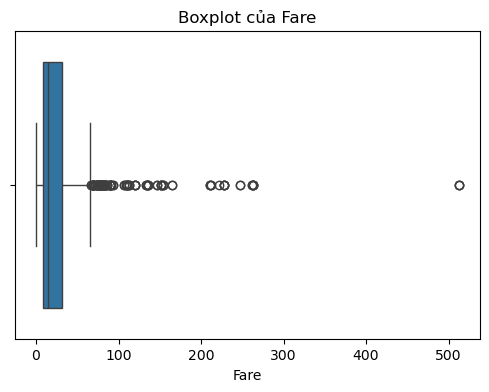

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_train["Fare"])
plt.title("Boxplot của Fare")
plt.show()

**Nhận xét:**
- Fare có nhiều giá trị ngoại lai (outlier) nằm ở phía giá vé cao, trong khi phần lớn hành khách có vé dưới 100
→ Phân phối lệch phải mạnh, có thể xem xét chuẩn hóa hoặc log-transform trước khi huấn luyện mô hình.

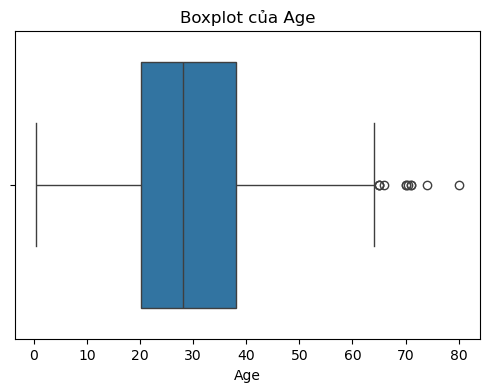

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_train["Age"])
plt.title("Boxplot của Age")
plt.show()

**Nhận xét:**
- Age phân bố khá đều, ít outlier, đa phần nằm trong khoảng [20–40 tuổi]. → Phân phối lệch phải mạnh, có thể xem xét chuẩn hóa hoặc log-transform trước khi huấn luyện mô hình.